Demo 02: Detección y Manejo de Outliers
========================================
Esta demostración muestra técnicas para identificar y manejar valores
atípicos en datos de sensores de pozos petroleros.

In [ ]:
%pip install pandas numpy matplotlib seaborn scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Cargar datos

In [4]:
print("=" * 60)
print("DEMO 02: DETECCIÓN Y MANEJO DE OUTLIERS")
print("=" * 60)
# Cargar datos
print("\n1. CARGANDO DATOS DE SENSORES")
print("-" * 40)
df = pd.read_csv('/workspaces/CursoPython-Basico-JuanDavid/Sesión_14/datos/sensores_pozos.csv')
print(f"Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
print(f"Columnas: {list(df.columns)}")

DEMO 02: DETECCIÓN Y MANEJO DE OUTLIERS

1. CARGANDO DATOS DE SENSORES
----------------------------------------
Dataset cargado: 697 filas, 7 columnas
Columnas: ['timestamp', 'sensor_id', 'presion_fondo_psi', 'temperatura_fondo_f', 'caudal_instantaneo_bbl_h', 'vibracion_hz', 'nivel_tanque_ft']


Exploración inicial

In [5]:
print("\n2. ESTADÍSTICAS DESCRIPTIVAS")
print("-" * 40)
print("\nEstadísticas básicas:")
print(df.describe())


2. ESTADÍSTICAS DESCRIPTIVAS
----------------------------------------

Estadísticas básicas:
       presion_fondo_psi  temperatura_fondo_f  caudal_instantaneo_bbl_h  \
count         684.000000           684.000000                684.000000   
mean         3029.513304           251.442982                 19.440000   
std           414.620730            21.047019                  5.206571   
min          2564.300000           200.900000                -39.650000   
25%          2904.250000           240.600000                 17.787500   
50%          2991.050000           249.900000                 19.895000   
75%          3101.675000           259.900000                 21.865000   
max          9126.000000           499.000000                 29.040000   

       vibracion_hz  nivel_tanque_ft  
count    684.000000       684.000000  
mean      51.010965        14.951316  
std       15.752891         2.296458  
min       32.300000         3.800000  
25%       46.100000        13.54750

Definimos nuestras funciones

Función para detectar outliers usando IQR

In [1]:
def detectar_outliers_iqr(df, columna, factor=1.5):
    """
    Detecta outliers usando el método del rango intercuartílico (IQR)
    """
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - factor * IQR
    limite_superior = Q3 + factor * IQR
    
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers, limite_inferior, limite_superior

Función para detectar outliers usando Z-score

In [7]:
# Función para detectar outliers usando Z-score
def detectar_outliers_zscore(df, columna, threshold=3):
    """
    Detecta outliers usando Z-score (desviaciones estándar)
    """
    z_scores = np.abs(stats.zscore(df[columna].dropna()))
    outliers_mask = z_scores > threshold
    outliers = df[columna].dropna()[outliers_mask]
    return outliers

DETECCIÓN DE OUTLIERS - MÉTODO IQR

In [8]:
print("\n3. DETECCIÓN DE OUTLIERS - MÉTODO IQR")
print("-" * 40)

columnas_analizar = ['presion_fondo_psi', 'temperatura_fondo_f', 
                     'caudal_instantaneo_bbl_h', 'vibracion_hz']

outliers_info = {}
for col in columnas_analizar:
    outliers, lim_inf, lim_sup = detectar_outliers_iqr(df, col)
    outliers_info[col] = {
        'outliers': outliers,
        'lim_inf': lim_inf,
        'lim_sup': lim_sup,
        'count': len(outliers)
    }
    print(f"\n{col}:")
    print(f"  Límites IQR: [{lim_inf:.2f}, {lim_sup:.2f}]")
    print(f"  Outliers detectados: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
    if len(outliers) > 0:
        print(f"  Rango de outliers: [{outliers[col].min():.2f}, {outliers[col].max():.2f}]")


3. DETECCIÓN DE OUTLIERS - MÉTODO IQR
----------------------------------------

presion_fondo_psi:
  Límites IQR: [2608.11, 3397.81]
  Outliers detectados: 10 (1.4%)
  Rango de outliers: [2564.30, 9126.00]

temperatura_fondo_f:
  Límites IQR: [211.65, 288.85]
  Outliers detectados: 11 (1.6%)
  Rango de outliers: [200.90, 499.00]

caudal_instantaneo_bbl_h:
  Límites IQR: [11.67, 27.98]
  Outliers detectados: 10 (1.4%)
  Rango de outliers: [-39.65, 29.04]

vibracion_hz:
  Límites IQR: [35.15, 64.35]
  Outliers detectados: 9 (1.3%)
  Rango de outliers: [32.30, 275.30]


DETECCIÓN DE OUTLIERS - MÉTODO Z-SCORE

In [9]:
print("\n4. DETECCIÓN DE OUTLIERS - MÉTODO Z-SCORE")
print("-" * 40)

for col in columnas_analizar:
    outliers_z = detectar_outliers_zscore(df, col, threshold=3)
    print(f"\n{col}:")
    print(f"  Outliers (|Z| > 3): {len(outliers_z)} valores")


4. DETECCIÓN DE OUTLIERS - MÉTODO Z-SCORE
----------------------------------------

presion_fondo_psi:
  Outliers (|Z| > 3): 5 valores

temperatura_fondo_f:
  Outliers (|Z| > 3): 4 valores

caudal_instantaneo_bbl_h:
  Outliers (|Z| > 3): 5 valores

vibracion_hz:
  Outliers (|Z| > 3): 5 valores


VISUALIZACIÓN DE OUTLIERS


5. VISUALIZACIÓN DE OUTLIERS
----------------------------------------
Gráfico guardado como 'outliers_boxplots.png'


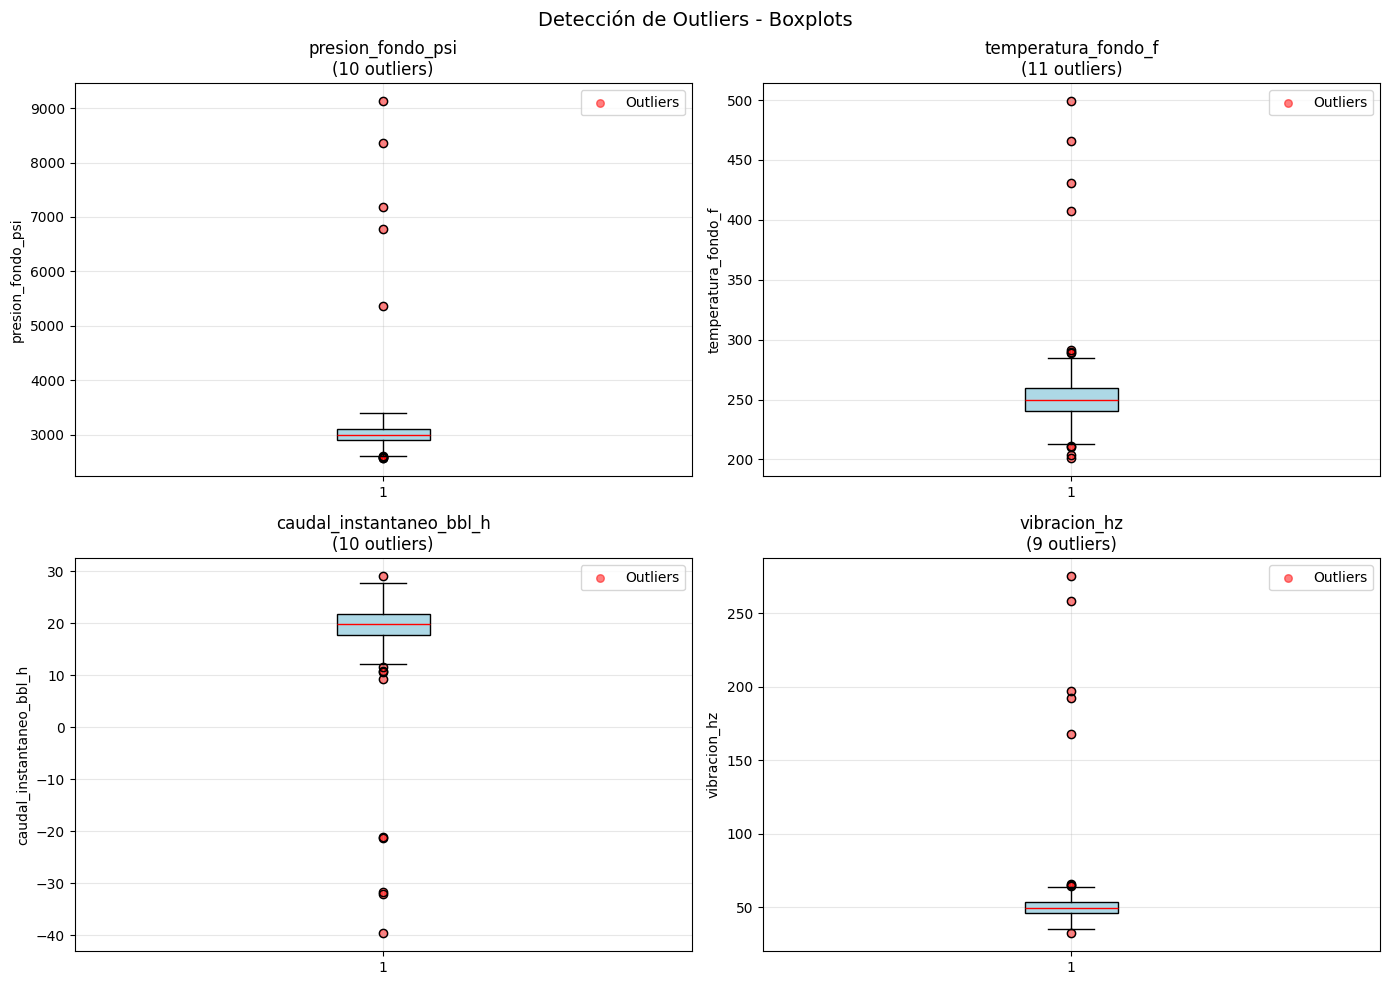

In [10]:
# Visualización de outliers
print("\n5. VISUALIZACIÓN DE OUTLIERS")
print("-" * 40)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(columnas_analizar):
    ax = axes[idx]
    
    # Boxplot
    bp = ax.boxplot(df[col].dropna(), vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['medians'][0].set_color('red')
    
    # Marcar outliers detectados
    outliers_data = outliers_info[col]['outliers'][col]
    if len(outliers_data) > 0:
        ax.scatter(np.ones(len(outliers_data)), outliers_data, 
                  color='red', alpha=0.5, s=30, label='Outliers')
    
    ax.set_ylabel(col)
    ax.set_title(f'{col}\n({outliers_info[col]["count"]} outliers)')
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.suptitle('Detección de Outliers - Boxplots', fontsize=14)
plt.tight_layout()
plt.savefig('outliers_boxplots.png')
print("Gráfico guardado como 'outliers_boxplots.png'")

ANÁLISIS DETALLADO DE OUTLIERS

In [11]:
# Análisis detallado de outliers
print("\n6. ANÁLISIS DETALLADO DE OUTLIERS")
print("-" * 40)

# Identificar valores imposibles o sospechosos
print("\nValores físicamente imposibles o sospechosos:")

# Presión negativa o extremadamente alta
presion_sospechosa = df[(df['presion_fondo_psi'] < 0) | (df['presion_fondo_psi'] > 5000)]
if len(presion_sospechosa) > 0:
    print(f"\nPresión fuera de rango operacional normal:")
    print(f"  Registros: {len(presion_sospechosa)}")
    print(f"  Valores: {presion_sospechosa['presion_fondo_psi'].values[:5]}...")

# Caudal negativo
caudal_negativo = df[df['caudal_instantaneo_bbl_h'] < 0]
if len(caudal_negativo) > 0:
    print(f"\nCaudal negativo (imposible):")
    print(f"  Registros: {len(caudal_negativo)}")
    print(f"  Valores: {caudal_negativo['caudal_instantaneo_bbl_h'].values[:5]}...")

# Vibración anormal
vibracion_alta = df[df['vibracion_hz'] > 100]
if len(vibracion_alta) > 0:
    print(f"\nVibración anormalmente alta (posible falla):")
    print(f"  Registros: {len(vibracion_alta)}")
    print(f"  Valores: {vibracion_alta['vibracion_hz'].values[:5]}...")


6. ANÁLISIS DETALLADO DE OUTLIERS
----------------------------------------

Valores físicamente imposibles o sospechosos:

Presión fuera de rango operacional normal:
  Registros: 5
  Valores: [8366.  9126.  5362.7 7189.8 6775. ]...

Caudal negativo (imposible):
  Registros: 5
  Valores: [-31.69 -32.14 -21.38 -39.65 -21.14]...

Vibración anormalmente alta (posible falla):
  Registros: 5
  Valores: [197.5 168.1 275.3 192.4 258.8]...


Estrategias de manejo de outliers

Estrategia 1: Eliminación de outliers extremos

In [17]:
# Estrategias de manejo de outliers
print("\n7. ESTRATEGIAS DE MANEJO")
print("-" * 40)

df_limpio = df.copy()

print("\nEstrategia 1: Eliminación de outliers extremos")
# Eliminar valores físicamente imposibles
inicial = len(df_limpio)
df_limpio = df_limpio[df_limpio['caudal_instantaneo_bbl_h'] >= 0]  # Caudal no puede ser negativo
df_limpio = df_limpio[df_limpio['presion_fondo_psi'] > 0]  # Presión debe ser positiva
print(f"  Registros eliminados: {inicial - len(df_limpio)}")


7. ESTRATEGIAS DE MANEJO
----------------------------------------

Estrategia 1: Eliminación de outliers extremos
  Registros eliminados: 31


Estrategia 2: Capping (limitar a percentiles)

In [18]:
print("\nEstrategia 2: Capping (limitar a percentiles)")
# Limitar valores extremos a percentiles 1 y 99
for col in ['presion_fondo_psi', 'temperatura_fondo_f']:
    p01 = df_limpio[col].quantile(0.01)
    p99 = df_limpio[col].quantile(0.99)
    valores_antes = ((df_limpio[col] < p01) | (df_limpio[col] > p99)).sum()
    df_limpio[col] = df_limpio[col].clip(p01, p99)
    print(f"  {col}: {valores_antes} valores limitados a [{p01:.2f}, {p99:.2f}]")


Estrategia 2: Capping (limitar a percentiles)
  presion_fondo_psi: 14 valores limitados a [2655.76, 3366.69]
  temperatura_fondo_f: 14 valores limitados a [218.97, 286.89]


Estrategia 3: Transformación (para alta vibración)

In [19]:
print("\nEstrategia 3: Transformación (para alta vibración)")
# Aplicar transformación logarítmica para reducir impacto de outliers
df_limpio['log_vibracion'] = np.log1p(df_limpio['vibracion_hz'])
print(f"  Transformación logarítmica aplicada a vibracion_hz")


Estrategia 3: Transformación (para alta vibración)
  Transformación logarítmica aplicada a vibracion_hz


Estrategia 4: Imputación con mediana (para outliers moderados)

In [20]:
print("\nEstrategia 4: Imputación con mediana (para outliers moderados)")
# Reemplazar outliers con la mediana
for col in ['nivel_tanque_ft']:
    outliers, lim_inf, lim_sup = detectar_outliers_iqr(df_limpio, col, factor=3)
    if len(outliers) > 0:
        mediana = df_limpio[col].median()
        df_limpio.loc[(df_limpio[col] < lim_inf) | (df_limpio[col] > lim_sup), col] = mediana
        print(f"  {col}: {len(outliers)} outliers reemplazados con mediana={mediana:.2f}")


Estrategia 4: Imputación con mediana (para outliers moderados)
  nivel_tanque_ft: 2 outliers reemplazados con mediana=14.91


COMPARACIÓN ANTES Y DESPUÉS


8. COMPARACIÓN ANTES Y DESPUÉS
----------------------------------------
Gráfico guardado como 'comparacion_outliers.png'


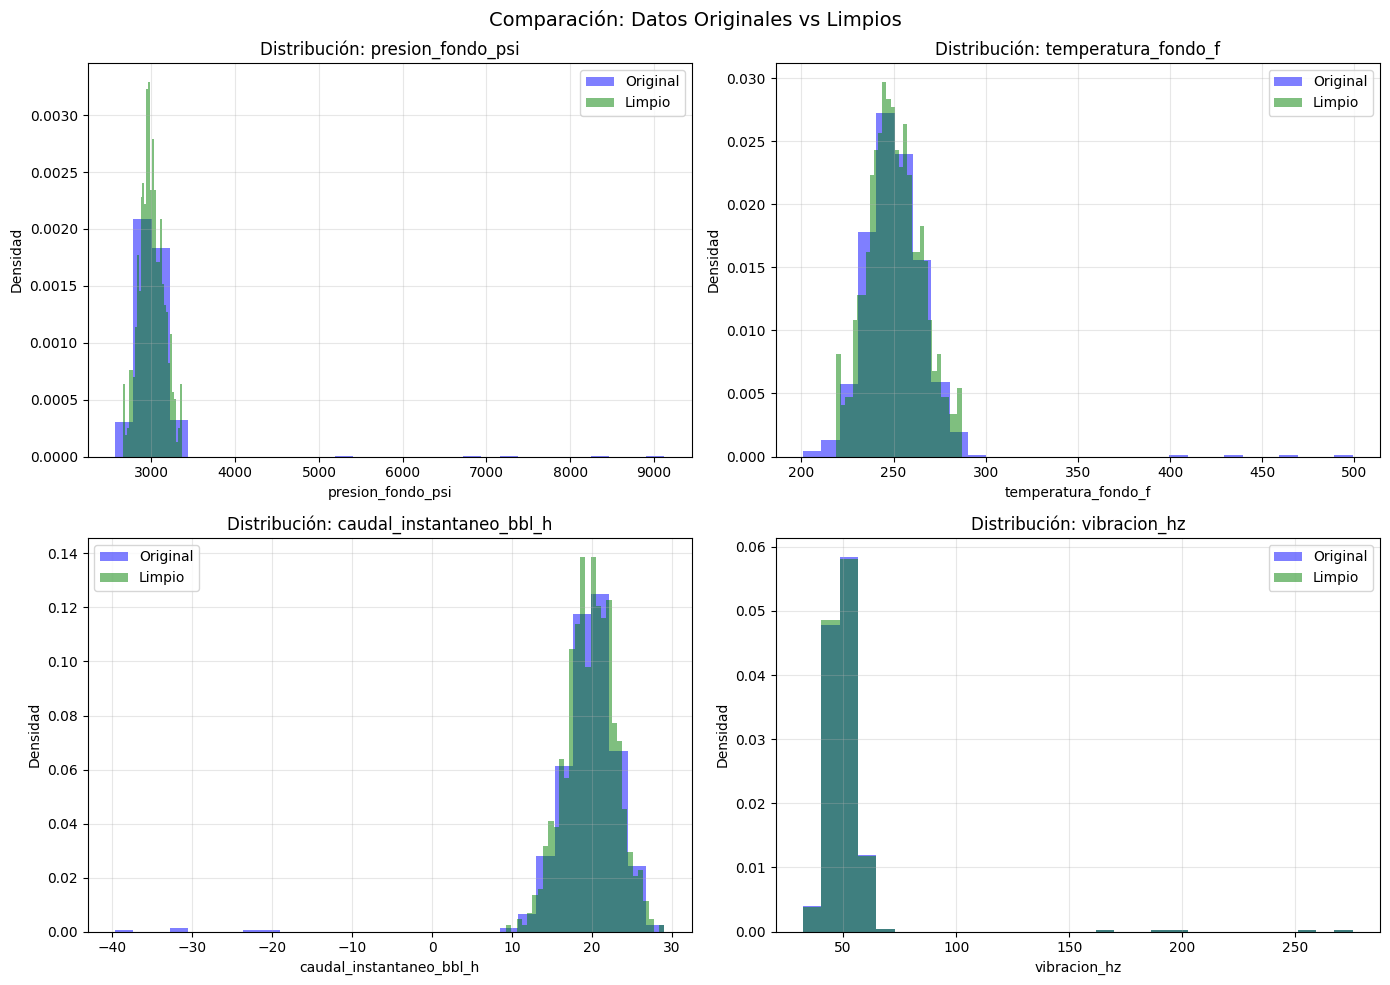

In [21]:
# Comparación antes y después
print("\n8. COMPARACIÓN ANTES Y DESPUÉS")
print("-" * 40)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, col in enumerate(['presion_fondo_psi', 'temperatura_fondo_f', 
                           'caudal_instantaneo_bbl_h', 'vibracion_hz']):
    row = idx // 2
    col_idx = idx % 2
    ax = axes[row, col_idx]
    
    # Histograma comparativo
    ax.hist(df[col].dropna(), bins=30, alpha=0.5, label='Original', color='blue', density=True)
    if col in df_limpio.columns:
        ax.hist(df_limpio[col].dropna(), bins=30, alpha=0.5, label='Limpio', color='green', density=True)
    
    ax.set_xlabel(col)
    ax.set_ylabel('Densidad')
    ax.set_title(f'Distribución: {col}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Comparación: Datos Originales vs Limpios', fontsize=14)
plt.tight_layout()
plt.savefig('comparacion_outliers.png')
print("Gráfico guardado como 'comparacion_outliers.png'")

VALIDACIÓN CONTEXTUAL PARA INDUSTRIA PETROLERA

In [22]:
# Validación contextual
print("\n9. VALIDACIÓN CONTEXTUAL PARA INDUSTRIA PETROLERA")
print("-" * 40)
print("""
Rangos operacionales típicos para validación:

PRESIÓN DE FONDO:
  - Normal: 2000-4000 psi
  - Alerta: < 1500 o > 4500 psi
  - Crítico: < 1000 o > 5000 psi

TEMPERATURA DE FONDO:
  - Normal: 200-300 °F
  - Alerta: < 150 o > 350 °F
  - Crítico: < 100 o > 400 °F

CAUDAL INSTANTÁNEO:
  - Normal: 10-30 bbl/h
  - Alerta: < 5 o > 40 bbl/h
  - Crítico: <= 0 o > 50 bbl/h

VIBRACIÓN:
  - Normal: 40-60 Hz
  - Alerta: > 80 Hz
  - Crítico: > 100 Hz (posible falla mecánica)
""")


9. VALIDACIÓN CONTEXTUAL PARA INDUSTRIA PETROLERA
----------------------------------------

Rangos operacionales típicos para validación:

PRESIÓN DE FONDO:
  - Normal: 2000-4000 psi
  - Alerta: < 1500 o > 4500 psi
  - Crítico: < 1000 o > 5000 psi

TEMPERATURA DE FONDO:
  - Normal: 200-300 °F
  - Alerta: < 150 o > 350 °F
  - Crítico: < 100 o > 400 °F

CAUDAL INSTANTÁNEO:
  - Normal: 10-30 bbl/h
  - Alerta: < 5 o > 40 bbl/h
  - Crítico: <= 0 o > 50 bbl/h

VIBRACIÓN:
  - Normal: 40-60 Hz
  - Alerta: > 80 Hz
  - Crítico: > 100 Hz (posible falla mecánica)



In [23]:
# Crear función de validación
def validar_rangos_operacionales(df):
    """
    Valida que los valores estén dentro de rangos operacionales seguros
    """
    alertas = []
    
    # Presión
    if (df['presion_fondo_psi'] < 1000).any():
        alertas.append("CRÍTICO: Presión muy baja detectada")
    elif (df['presion_fondo_psi'] < 1500).any():
        alertas.append("ALERTA: Presión baja detectada")
    
    if (df['presion_fondo_psi'] > 5000).any():
        alertas.append("CRÍTICO: Presión muy alta detectada")
    elif (df['presion_fondo_psi'] > 4500).any():
        alertas.append("ALERTA: Presión alta detectada")
    
    # Vibración
    if (df['vibracion_hz'] > 100).any():
        alertas.append("CRÍTICO: Vibración excesiva - posible falla mecánica")
    elif (df['vibracion_hz'] > 80).any():
        alertas.append("ALERTA: Vibración elevada")
    
    return alertas


In [25]:
alertas = validar_rangos_operacionales(df)
if alertas:
    print("\nAlertas operacionales detectadas:")
    for alerta in alertas:
        print(f"  ⚠️ {alerta}")



Alertas operacionales detectadas:
  ⚠️ CRÍTICO: Presión muy alta detectada
  ⚠️ CRÍTICO: Vibración excesiva - posible falla mecánica


In [27]:
# Guardar dataset limpio
df_limpio.to_csv('/workspaces/CursoPython-Basico-JuanDavid/Sesión_14/datos/sensores_pozos_limpio.csv', index=False)
print("\nDataset limpio guardado como 'sensores_pozos_limpio.csv'")

print("\n" + "=" * 60)
print("DEMO COMPLETADA")
print("=" * 60)


Dataset limpio guardado como 'sensores_pozos_limpio.csv'

DEMO COMPLETADA
